In [1]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm
from MyHelper import *
import pandas as pd

In [2]:
downloadData(filename,loc)

In [3]:
X,y=getData(filename,loc)

In [4]:
img_size,nchannels = X.shape[1],X.shape[-1]

In [5]:
batch_size = 16

# TensorFlow Helpers

In [6]:
def createWeight(size,Name):
    return tf.Variable(tf.truncated_normal(size, stddev=0.1),name=Name)

def createBias(size,Name):
    return tf.Variable(tf.constant(0.1,shape=size),name=Name)

def lrelu(x, leak=0.2):
    f1 = 0.5 * (1 + leak)
    f2 = 0.5 * (1 - leak)
    return f1 * x + f2 * abs(x)

# Discriminator

In [7]:

g = tf.Graph()
with g.as_default():
    img_input = tf.placeholder(tf.float32,shape=(batch_size,img_size,img_size,nchannels))
    
    W_conv1 = createWeight([5,5,nchannels,64],'d_conv1')
    b_conv1 = createWeight([64],'d_b1')
    
    W_conv2 = createWeight([5,5,64,128],'d_conv2')
    b_conv2 = createWeight([128],'d_b2')

    W_conv3 = createWeight([5,5,128,256],'d_conv3')
    b_conv3 = createWeight([256],'d_b3')

    W_conv4 = createWeight([5,5,256,512],'d_conv4')
    b_conv4 = createWeight([512],'d_b4')
    
    W_logit = createWeight([512*2*2,1],'d_W_logit')
    b_logit = createWeight([1],'d_b_logit')
    
    d_var_list = [W_conv1,b_conv1,W_conv2,b_conv2,W_conv3,b_conv3,W_conv4,b_conv4,W_logit,b_logit]
    
    def D(img_input,var_list):
        W_conv1 = var_list[0]
        b_conv1 = var_list[1]

        W_conv2 = var_list[2]
        b_conv2 = var_list[3]

        W_conv3 = var_list[4]
        b_conv3 = var_list[5]

        W_conv4 = var_list[6]
        b_conv4 = var_list[7]


        conv1 = tf.nn.conv2d(img_input,W_conv1,strides=[1,2,2,1],padding="SAME")
        h1 = lrelu(conv1+b_conv1)

        conv2 = tf.nn.conv2d(h1,W_conv2,strides=[1,2,2,1],padding="SAME")
        h2 = lrelu(conv2+b_conv2)

        conv3 = tf.nn.conv2d(h2,W_conv3,strides=[1,2,2,1],padding="SAME")
        h3 = lrelu(conv3+b_conv3)

        conv4 = tf.nn.conv2d(h3,W_conv4,strides=[1,2,2,1],padding="SAME")
        h4 = lrelu(conv4+b_conv4)

        h4_s = tf.shape(h4)
        h4_flat = tf.reshape(h4,[batch_size,512*(h4_s[1])*(h4_s[2])]) #512*2*2


        logit = tf.matmul(h4_flat,W_logit)+b_logit
        
        return logit
    

# Random Distribution

In [8]:
def Z(n,batch_size):
    """
    Uniform random distribution
    
    Parameters
    -------------
    n : int
        size of the vector to return
    """
    return np.random.uniform(-1, 1, [batch_size,n])

In [9]:
# n = 100 #from paper
n=100

# Random Class

In [14]:
def one_hot(x):
    r=np.zeros(10)
    r[x]=1
    return r

def mat_one_hot(x):
    r = np.ndarray([x.shape[0],10])
    for i in range(x.shape[0]):
        r[i,:]=one_hot(x[i][0])
    return r
one_hot(9)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])

In [15]:
def C(batch_size):
    x = np.random.randint(0,10,size=[batch_size,1])
    return mat_one_hot(x)

In [16]:
C(batch_size)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

# Class

In [17]:
y_one_hot = mat_one_hot(y)

/home/floptical/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [41]:
y

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]], dtype=float32)

In [40]:
y_one_hot[2090]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

# Generator

In [19]:

with g.as_default():
    z_input = tf.placeholder(tf.float32,shape=(batch_size,n))
    class_input = tf.placeholder(tf.float32,shape=(batch_size,10))

    W_project = createWeight([n+10,4*4*1024],'g_project')
    b_project = createBias([1,4*4*1024],'g_b_project')

    W_conv1 = createWeight([4,4,512,1024],'g_conv1')
    b_conv1 = createWeight([512],'g_b1')

    W_conv2 = createWeight([7,7,256,512],'g_conv2')
    b_conv2 = createWeight([256],'g_b2')

    W_conv3 = createWeight([14,14,1,256],'g_conv3')
    b_conv3 = createWeight([1],'g_b3')
    
    g_var_list = [W_project,b_project,W_conv1,b_conv1,W_conv2,b_conv2,W_conv3,b_conv3]
    
    def G(z,c,var_list):
        W_project=var_list[0]
        b_project=var_list[1]
        
        W_conv1 = var_list[2]
        b_conv1 = var_list[3]
        
        W_conv2 = var_list[4]
        b_conv2 = var_list[5]
        
        W_conv3 = var_list[6]
        b_conv3 = var_list[7]

        prjt = tf.matmul(tf.concat(1,[z,c]),W_project)+b_project
        h0 = lrelu(tf.reshape(prjt,shape=(batch_size,4,4,1024)))

        conv1 = tf.nn.conv2d_transpose(h0,W_conv1,output_shape=[batch_size,7,7,512],strides=[1,2,2,1])
        h1 = lrelu(conv1+b_conv1)

        conv2 = tf.nn.conv2d_transpose(h1,W_conv2,output_shape=[batch_size,14,14,256],strides=[1,2,2,1])
        h2 = lrelu(conv2+b_conv2)

        conv3 = tf.nn.conv2d_transpose(h2,W_conv3,output_shape=[batch_size,28,28,1],strides=[1,2,2,1])
        h3 = lrelu(conv3+b_conv3)
        return h3

# Get Variable lists

In [20]:
with g.as_default():
    all_vars = tf.trainable_variables()
    a = all_vars[0]
    print ([v.name for v in all_vars])

[u'd_conv1:0', u'd_b1:0', u'd_conv2:0', u'd_b2:0', u'd_conv3:0', u'd_b3:0', u'd_conv4:0', u'd_b4:0', u'd_W_logit:0', u'd_b_logit:0', u'g_project:0', u'g_b_project:0', u'g_conv1:0', u'g_b1:0', u'g_conv2:0', u'g_b2:0', u'g_conv3:0', u'g_b3:0']


# Setup Train

In [21]:
with g.as_default():
    z_input = tf.placeholder(tf.float32,shape=(batch_size,n))
    class_input = tf.placeholder(tf.float32,shape=(batch_size,10))
    img_input = tf.placeholder(tf.float32,shape=(batch_size,img_size,img_size,nchannels))
    
    G_z = G(z_input,class_input,g_var_list)
    D_x = D(img_input,d_var_list)
    D_fake = D(G_z,d_var_list)
    
    
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(D_x,tf.ones(shape=[batch_size,1]))+\
            tf.nn.sigmoid_cross_entropy_with_logits(D_fake,tf.zeros(shape=[batch_size,1])))
        
    loss_gen = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(D_fake,tf.ones([batch_size,1])))
    
    opt_d = tf.train.AdamOptimizer(learning_rate=.0002,beta1=.5)
    opt_g = tf.train.AdamOptimizer(learning_rate=.0002,beta1=.5)
    
    d_grads = opt_d.compute_gradients(loss,var_list=d_var_list)
    d_minimize = opt_d.apply_gradients(d_grads)
    
    g_grads = opt_g.compute_gradients(loss_gen,var_list=g_var_list)
    g_max = opt_g.apply_gradients(g_grads)


# Other

In [22]:
with g.as_default():
    init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


# Session Trains

In [49]:
sess = tf.Session(graph=g)
sess.run(init)

In [50]:
losses = []
losses_g = []

In [51]:
X.shape[0]/(1.0*batch_size)

3750.0

In [58]:
num_steps = 3700
extra = 3
num_epochs = 40
for _ in xrange(num_epochs):
    for i in tqdm(xrange(num_steps)):
        img_batch = X[i*(batch_size):i*(batch_size)+batch_size,:,:,:]
        fd = {z_input:Z(n,batch_size),img_input:img_batch,class_input:y[i*batch_size:i*batch_size+batch_size,:]}
        l,_ = sess.run([loss,d_minimize],feed_dict=fd)
        for _ in xrange(extra):
            lg,_ = sess.run([loss_gen,g_max],feed_dict=fd)
        losses.append(l),losses_g.append(lg)
G_test = sess.run(G_z,feed_dict=fd)

100%|██████████| 3700/3700 [12:47<00:00,  4.82it/s]


In [59]:
fd = {z_input:Z(n,batch_size),img_input:img_batch,class_input:C(batch_size)}
G_test = sess.run(G_z,feed_dict=fd)

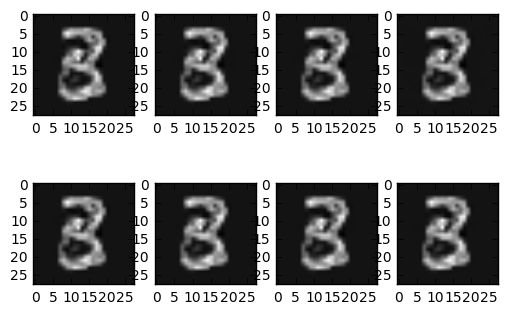

In [60]:
plt.subplot(241)
plt.imshow(G_test[0,:,:,0],cmap='gray')
plt.subplot(242)
plt.imshow(G_test[1,:,:,0],cmap='gray')
plt.subplot(243)
plt.imshow(G_test[2,:,:,0],cmap='gray')
plt.subplot(244)
plt.imshow(G_test[3,:,:,0],cmap='gray')
plt.subplot(245)
plt.imshow(G_test[4,:,:,0],cmap='gray')
plt.subplot(246)
plt.imshow(G_test[5,:,:,0],cmap='gray')
plt.subplot(247)
plt.imshow(G_test[6,:,:,0],cmap='gray')
plt.subplot(248)
plt.imshow(G_test[7,:,:,0],cmap='gray')

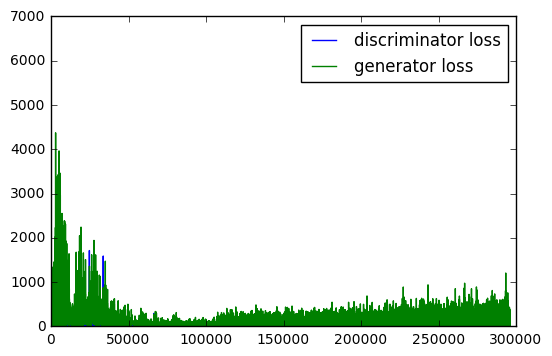

In [61]:
plt.plot(np.arange(len(losses)),losses,np.arange(len(losses)),losses_g)
plt.legend(['discriminator loss','generator loss'])
# plt.ylim([0,10e])

/home/floptical/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()
  app.launch_new_instance()


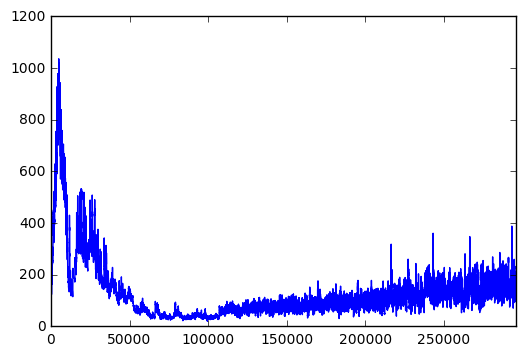

In [62]:
pdloss=pd.Series(losses_g)
# pdloss.rolling(20)
pd.rolling_mean(pdloss,100).plot()

/home/floptical/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()
  from ipykernel import kernelapp as app


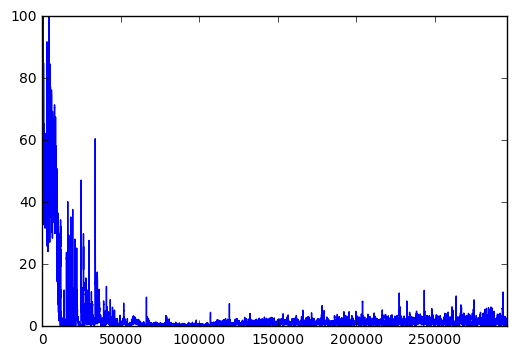

In [65]:
pdloss_d=pd.Series(losses)
pd.rolling_mean(pdloss_d,100).plot(ylim=(0,100))

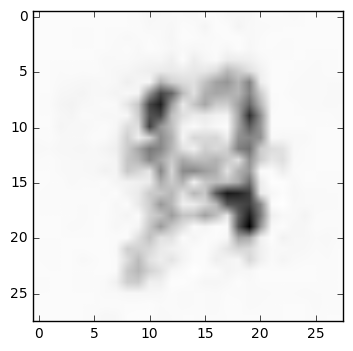

In [25]:
z_test = Z(n,batch_size)
z_test[0,:] = np.ones(n)
fd = {z_input:z_test}
G_test = sess.run(G_z,feed_dict=fd)
plt.imshow(G_test[0,:,:,0],cmap='Greys')